In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from IPython.display import HTML
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy import special
from scipy.stats import probplot
from tqdm import tqdm

In [2]:
N = 2000

In [3]:
n_sample = 500

In [4]:
device = "mps"

In [10]:
with torch.no_grad():
    x = torch.randn(5, dtype=torch.float16).to(device=device)
    W = torch.randn(5, N, dtype=torch.float16).to(device=device)
    H = x @ W
    S = torch.special.expit(H)[None, :, None]
    B = torch.randn(n_sample, N, N, dtype=torch.float16).to(device=device)

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Insufficient Memory (00000008:kIOGPUCommandBufferCallbackErrorOutOfMemory)
	<AGXG14GFamilyCommandBuffer: 0x12eb7ee60>
    label = <none> 
    device = <AGXG14GDevice: 0x12e022000>
        name = Apple M2 
    commandQueue = <AGXG14GFamilyCommandQueue: 0x148b52000>
        label = <none> 
        device = <AGXG14GDevice: 0x12e022000>
            name = Apple M2 
    retainedReferences = 1


In [21]:
k = 1000

In [52]:
for _ in tqdm(range(k)):
    H = B @ S / np.sqrt(N)
    S = special.expit(H)

In [55]:
H = np.load("./output/pre_activation.npy")

1

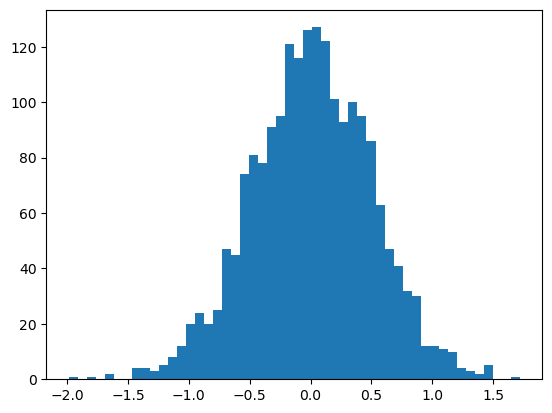

In [56]:
plt.hist(H[:,25,0], bins=50)
1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


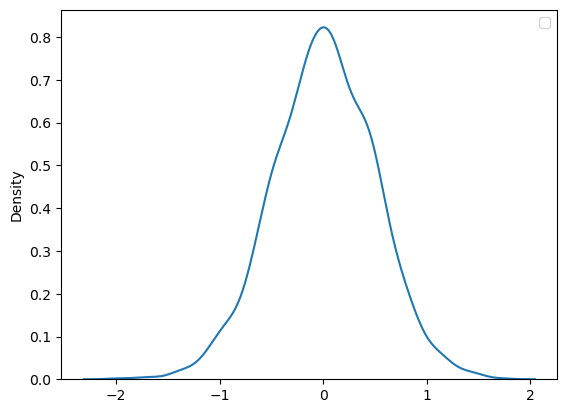

In [57]:
sns.kdeplot(H[:,25,0])
plt.legend()

1

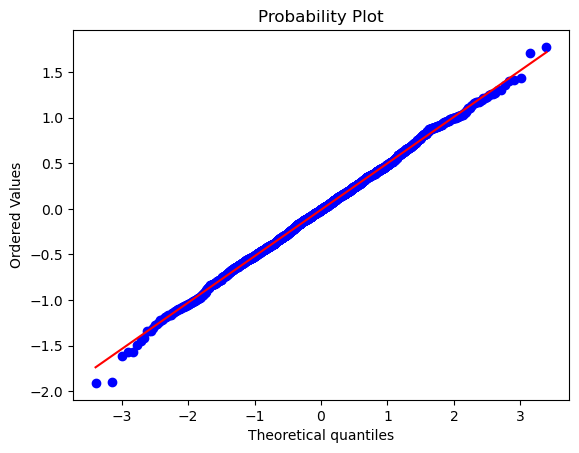

In [64]:
fig, ax = plt.subplots()
probplot(H[:,20,0], plot=ax)
1